In [6]:
!pip install pgmpy

In [7]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import GibbsSampling

In [8]:
network = BayesianNetwork ([('Burglary', 'Alarm'),
('Earthquake', 'Alarm'), ('Alarm', 'JohnCalls'),
('Alarm', 'MaryCalls')])

In [9]:
cpd_burglary = TabularCPD (variable='Burglary', variable_card=2, values=[[0.999], [0.001]])
cpd_earthquake = TabularCPD (variable='Earthquake', variable_card=2, values=[[0.998], [0.002]])
cpd_alarm = TabularCPD (variable='Alarm',variable_card=2,values=[[0.999, 0.71, 0.06, 0.05],
[0.001, 0.29, 0.94, 0.95]],
evidence=['Burglary', 'Earthquake'],
evidence_card=[2, 2])
cpd_john_calls = TabularCPD (variable='JohnCalls',
variable_card=2,
values=[[0.95, 0.1], [0.05, 0.911]],
evidence=['Alarm'], evidence_card=[2])
cpd_mary_calls = TabularCPD (variable='MaryCalls', variable_card=2,values=[[0.99, 0.3], [0.01, 0.7]],
evidence=['Alarm'], evidence_card=[2])

In [10]:
network.add_cpds (cpd_burglary, cpd_earthquake, cpd_alarm, cpd_john_calls, cpd_mary_calls)
print("Bayesian Network Structure: ")
print (network)

Bayesian Network Structure: 
BayesianNetwork with 5 nodes and 4 edges


In [11]:
import networkx as nx
G=nx.DiGraph()
nodes =['Burglary', 'Earthquake', 'Alarm',
'JohnCalls', 'MaryCalls']
edges = [('Burglary', 'Alarm'), ('Earthquake',
'Alarm'),('Alarm', 'JohnCalls'), ('Alarm',
'MaryCalls')]

G.add_nodes_from (nodes)
G.add_edges_from (edges)

In [12]:
import matplotlib.pyplot as plt
pos = {
    'Burglary': (0, 0),
    'Earthquake':(2, 0),
    'Alarm' : (1, -2),
    'JohnCalls': (0, -4),
    'MaryCalls' : (2, 4)
}

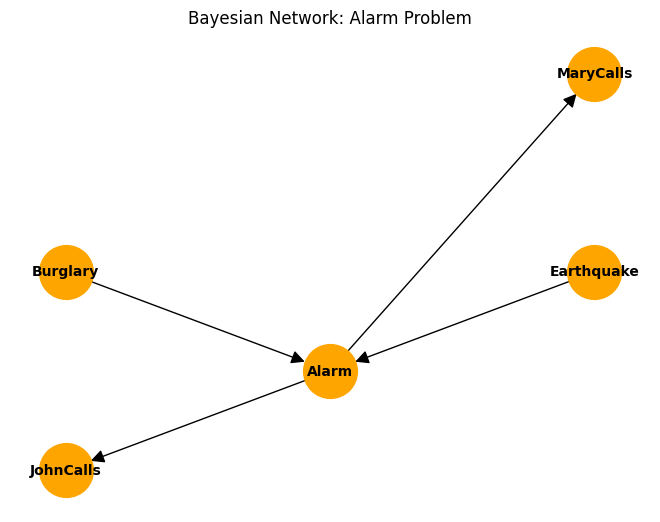

In [13]:
nx.draw(G, pos, with_labels=True, node_size=1500,node_color='orange', font_size=10,font_weight='bold', arrowsize=20)
import matplotlib.pyplot as plt
plt.title("Bayesian Network: Alarm Problem")
plt.show()

In [14]:
gibbs_sampler = GibbsSampling (network)
num_samples = 10000
samples= gibbs_sampler.sample (size=num_samples)

query_variable = 'Burglary'
query_result = samples [query_variable].value_counts (normalize=True)

print("Approximate Probabilities of {}:".format(query_variable))
print(query_result)

  0%|          | 0/9999 [00:00<?, ?it/s]

Approximate Probabilities of Burglary:
0    0.9995
1    0.0005
Name: Burglary, dtype: float64
